In [4]:
import os
import clip
import torch
from PIL import Image
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import torchvision.transforms as T
from dataset import Detr2ClipDataset
from torch.utils.data import Dataset, DataLoader

clip_model, clip_preprocess = clip.load('RN50', device='cpu')
coco_val = COCO('coco/annotations/instances_train2017.json')

loading annotations into memory...
Done (t=6.96s)
creating index...
index created!


In [5]:
transforms = T.Compose([T.Resize(224, T.InterpolationMode.BICUBIC),
                        T.CenterCrop(224)])

dataset = Detr2ClipDataset('data', 'coco', split='train', img_transforms=transforms, return_pil=True, return_info=True)
dataset_iter = iter(dataset)

loading annotations into memory...
Done (t=6.69s)
creating index...
index created!


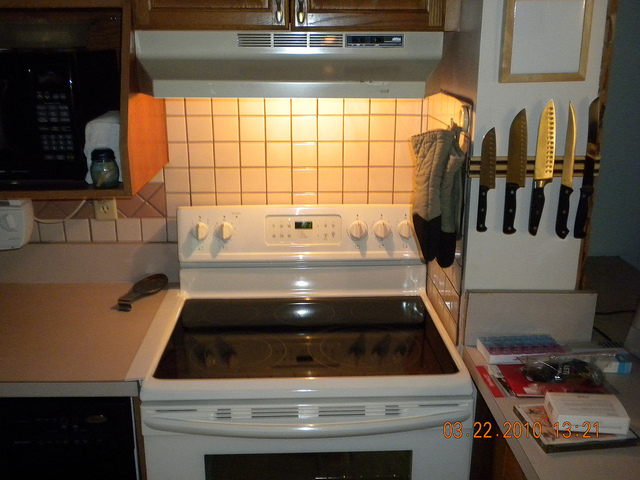

In [29]:
detr_feat, imgs, img_id, labels = next(dataset_iter)
Image.open(os.path.join('coco/train2017', coco_val.imgs[img_id]['file_name']))

['microwave', 'book', 'knife', 'knife', 'oven', 'knife', 'book', 'book', 'knife', 'knife']


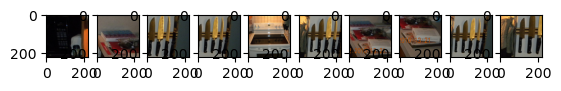

In [30]:
print([coco_val.cats[l]['name'] for l  in labels.tolist()])
fig, axes = plt.subplots(1, len(imgs))
if len(imgs) == 1:
    axes.imshow(imgs[0])
else:
    for i, ax in enumerate(axes):
        ax.imshow(imgs[i])